# LESSON 1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
boston = load_boston()

In [2]:
df1=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

df1

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
               'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
               'X6': 'Orientation', 'X7': 'Glazing_Area',
               'X8': 'Glazing_Area_Distribution',
               'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df1 = df1.rename(columns=column_names)

df1


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
df1.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
simple_linear_reg_df = df1 [['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

simple_linear_reg_df

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


# Select a sample of a dataset

In [6]:
simple_linear_reg_df = df1 [['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

simple_linear_reg_df

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


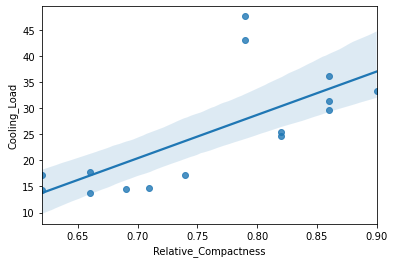

In [7]:
simple_linear_reg_df1 = df1[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
    
#regression plot
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=simple_linear_reg_df)

# Lesson 3,firstly, we will normalise our dataset to a common scale using the min max scaler¶

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
normalised_df = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
normalised_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


In [10]:
df1.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
# check no of columns
normalised_df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [12]:
#check if there is missing value
normalised_df.isnull().any().any()

False

In [13]:
normalised_df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [14]:
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
features_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


# lets split the column into X and Y

In [15]:
Y =normalised_df [['Heating_Load']]
Y

,Heating_Load
0,0.257212
1,0.257212
2,0.257212
3,0.257212
4,0.399838
...,...
763,0.320032
764,0.283904
765,0.281208
766,0.282286


In [16]:
Y.shape

(768, 1)

In [17]:
X = normalised_df [['Cooling_Load']]
X

,Cooling_Load
0,0.280905
1,0.280905
2,0.280905
3,0.280905
4,0.468085
...,...
763,0.282790
764,0.161056
765,0.167250
766,0.153784


In [18]:
X.shape

(768, 1)

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
Lm =LinearRegression()

# fit the model to the training dataset

In [23]:
Lm.fit(X_train, Y_train)

LinearRegression()

# obtain prediction

In [24]:
predictions = Lm.predict(X_test)

In [25]:
predictions

array([[0.14287195],
       [0.57651766],
       [0.74330447],
       [0.9807304 ],
       [0.83861122],
       [0.30209028],
       [0.29087772],
       [0.58604833],
       [0.23061022],
       [0.64070956],
       [0.24574718],
       [0.66621813],
       [0.57623734],
       [0.26592978],
       [0.19949537],
       [1.03987664],
       [0.85683162],
       [0.26256601],
       [0.16866084],
       [0.70630302],
       [0.48233216],
       [0.12156809],
       [0.45009606],
       [0.35478931],
       [0.23481493],
       [0.79572318],
       [0.23789839],
       [0.15156168],
       [1.0530514 ],
       [0.18099465],
       [0.67995351],
       [0.77105555],
       [0.17174429],
       [0.1961316 ],
       [0.62192852],
       [1.08528751],
       [0.33488702],
       [0.1358641 ],
       [0.78479093],
       [0.23117085],
       [0.77778309],
       [0.16641832],
       [0.08877135],
       [0.29199898],
       [0.151842  ],
       [0.29340055],
       [0.51653047],
       [0.491

# To calculate Mean Absolute Error(MAE)

In [26]:
#MAE
from sklearn.metrics import mean_absolute_error


In [27]:
mae = mean_absolute_error(Y_test, predictions)

In [28]:
mae

0.04883844599898926

In [29]:
round(mae, 3)

0.049

# R Squared.py

In [30]:
from sklearn.metrics import r2_score


In [31]:
r2_score = r2_score(Y_test, predictions)

r2_score


0.9413428003008779

In [32]:
round(r2_score, 3)

0.941

# Residual Sum Of Squares.py

In [33]:
rss = np.sum(np.square(Y_test - predictions))


In [34]:
rss

Heating_Load    1.00393
dtype: float64

In [35]:
round(rss, 3)

Heating_Load    1.004
dtype: float64

# Root Mean Square Error.py

In [36]:
from sklearn.metrics import  mean_squared_error

In [37]:
rmse = np.sqrt(mean_squared_error(Y_test, predictions))

rmse


0.0659243252980269

In [38]:
round(rmse, 3)

0.066

# comparing the effects of regularisation in lesson 4

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=0.5)

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [41]:
from sklearn.linear_model import LinearRegression
Lm =LinearRegression()

In [42]:
Lm.fit(X_train,  Y_train)

LinearRegression()

In [43]:
Lm.fit(boston.data, boston.target)
Lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [44]:
print(Lm.coef_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [45]:
def get_weights_df(Lm, feat, col_name):
  weights = pd.Series(Lm.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [46]:

linear_model_weights = get_weights_df(Lm, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

ValueError: Length of passed values is 13, index implies 1.

# Final Assesment

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

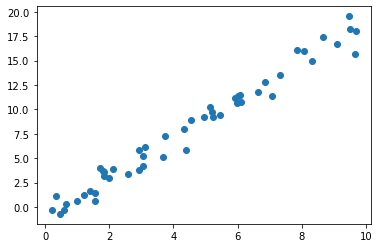

In [50]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [48]:
energy_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


# T0 Get Rid of Dates and Lights Columns, Use delete function

In [51]:
del energy_data['date']
del energy_data['lights']

In [52]:
# checking the columns again after removing date and lights columns
energy_data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [53]:
# Time to normalise the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
energy_data = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
energy_data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [55]:
#to check number of columns
energy_data.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [56]:
#check if there is missing value return true
energy_data.isnull().any().any()

False

In [57]:
energy_data.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

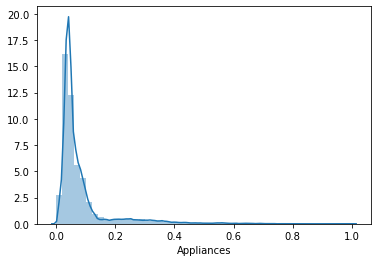

In [58]:
#to visualise appliances

sns.distplot(energy_data['Appliances'])

In [59]:
energy_data.shape

(19735, 27)

In [60]:
energy_data.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.081958,0.517061,0.364271,0.308303,0.561170,0.421038,0.489601,0.518499,0.485143,0.407272,...,0.478234,0.512655,0.399089,0.609828,0.733558,0.288554,0.574321,0.468810,0.499742,0.499742
std,0.095818,0.169595,0.109512,0.159412,0.114438,0.166676,0.152107,0.184044,0.185289,0.176266,...,0.209647,0.171833,0.170978,0.172080,0.196067,0.175087,0.181457,0.189803,0.289984,0.289984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037383,0.419219,0.283735,0.195542,0.490299,0.298272,0.380122,0.399099,0.335894,0.281653,...,0.323621,0.386313,0.278671,0.503101,0.609649,0.142857,0.430769,0.339367,0.249895,0.249895
50%,0.046729,0.507920,0.347675,0.283499,0.563408,0.407112,0.456302,0.501502,0.458387,0.387960,...,0.468262,0.485651,0.383173,0.623256,0.785088,0.261905,0.600000,0.453997,0.497934,0.497934
75%,0.084112,0.613516,0.441519,0.392537,0.641016,0.505982,0.607260,0.630631,0.618722,0.505460,...,0.594173,0.627956,0.495445,0.735659,0.890351,0.392857,0.600000,0.595777,0.751701,0.751701
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
predicted_value = energy_data['Appliances']
predicted_value

0        0.046729
1        0.046729
2        0.037383
3        0.037383
4        0.046729
           ...   
19730    0.084112
19731    0.074766
19732    0.242991
19733    0.383178
19734    0.392523
Name: Appliances, Length: 19735, dtype: float64

In [62]:
# To analysiing our columns
print("Total number of columns = {}".format(energy_data.columns.shape[0]))

Total number of columns = 27


In [63]:
target_variable = ["Appliances"]
temp = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]
humidity = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]
wheather =  ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]
random_var= ["rv1", "rv2"]

In [64]:
energy_data[target_variable].describe()

,Appliances
count,19735.000000
mean,0.081958
std,0.095818
min,0.000000
25%,0.037383
50%,0.046729
75%,0.084112
max,1.000000


In [65]:
energy_data[temp].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.517061,0.308303,0.421038,0.518499,0.407272,0.406809,0.459671,0.523873,0.478234
std,0.169595,0.159412,0.166676,0.184044,0.176266,0.177277,0.198868,0.179081,0.209647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419219,0.195542,0.298272,0.399099,0.281653,0.282104,0.311970,0.410436,0.323621
50%,0.507920,0.283499,0.407112,0.501502,0.387960,0.389026,0.437637,0.530363,0.468262
75%,0.613516,0.392537,0.505982,0.630631,0.505460,0.504177,0.585297,0.648459,0.594173
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
energy_data[humidity].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.364271,0.561170,0.489601,0.485143,0.317777,0.542053,0.432206,0.457031,0.512655
std,0.109512,0.114438,0.152107,0.185289,0.135656,0.314963,0.181355,0.179039,0.171833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283735,0.490299,0.380122,0.335894,0.234337,0.293478,0.294326,0.324423,0.386313
50%,0.347675,0.563408,0.456302,0.458387,0.289821,0.548938,0.413593,0.437800,0.485651
75%,0.441519,0.641016,0.607260,0.618722,0.358586,0.831412,0.560284,0.580398,0.627956
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
energy_data[wheather].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.399089,0.468810,0.733558,0.609828,0.288554,0.574321
std,0.170978,0.189803,0.196067,0.172080,0.175087,0.181457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278671,0.339367,0.609649,0.503101,0.142857,0.430769
50%,0.383173,0.453997,0.785088,0.623256,0.261905,0.600000
75%,0.495445,0.595777,0.890351,0.735659,0.392857,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
energy_data[random_var].describe()

,rv1,rv2
count,19735.000000,19735.000000
mean,0.499742,0.499742
std,0.289984,0.289984
min,0.000000,0.000000
25%,0.249895,0.249895
50%,0.497934,0.497934
75%,0.751701,0.751701
max,1.000000,1.000000


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()

In [73]:
# Remove  features T2 and T6
train = energy_data.drop(["T2", "T6"], axis=1)
test.drop(["T2", "T6"], axis=1, inplace=True)

KeyError: "['T2' 'T6'] not found in axis"

In [ ]:
ml.fit(x_train, y_train)